In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
d1, d2, ds = 4, 8, 1  # Degree range and step
const n, a, b = 2, 1, 6 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [2]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.1)

dimension Vector space: 15
sample size: 25
dimension Vector space: 21
sample size: 49
dimension Vector space: 28
sample size: 64
dimension Vector space: 36
sample size: 81
dimension Vector space: 45
sample size: 121


5-element Vector{Vector{Float64}}:
 [1.5106794866033013, -0.637980952653611, 0.22371010775220487, 0.61637073321931, -0.20502646248983597, 0.19809390603285618, -3.4074483066882113e-17, 0.6297398238849258, 4.3593858687885997e-17, 0.8155203261478072, 0.6297398238849258, 9.27424116002762e-17, -0.7331978963654703, 6.345801456298393e-17, 0.42876678868433216]
 [1.426234289471523, -0.4860718460958215, 0.22720257214043257, 0.7947343693222846, 0.15147175415777187, -0.9003996693850249, -0.7087453616647679, -1.033403031614764e-16, 0.6297280749088953, -8.402811644917457e-17  …  0.46034182043203503, 0.6297280749088956, -1.1871323552616075e-16, -0.0884255175145746, 0.46784419929838417, -3.742017914757176e-17, -0.08842551751457461, 0.19418160530632428, -0.04019841136237474, 1.1005962853806432]
 [1.6700680903097698, -0.3131194012310511, -0.08968183058824056, 0.0460778972873307, 0.10651847360091672, 0.5604805658526347, 0.15217449048586013, -0.4063124903553804, -1.801552659157667e-16, 0.6297280744115471 

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, ProgressLogging, DataFrames

include("hom_solve.jl") # Include the homotopy solver and main function
vars = @polyvar(x[1:n]) # Define polynomial ring 
h_x, h_y, col = main_2d(n, d1, d2, ds, coeffs_poly_approx) # main_2d is in hom_solve.jl
df = DataFrame(x=C * h_x, y=C * h_y, col=col)
df[!, :result] = [f([df.x[i], df.y[i]]) for i in 1:nrow(df)]


Computing mixed cells... 2    Time: 0:00:00
Computing mixed cells... 4    Time: 0:00:01
  mixed_volume:  9


Tracking 9 paths...  22%|██████▉                        |  ETA: 0:00:33



Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:10
  # paths tracked:                  9
  # non-singular solutions (real):  9 (5)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         9 (5)
Degree: 4
Number of solutions: 4
Tracking 16 paths...  12%|███▊                          |  ETA: 0:00:28



Tracking 16 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  16
  # non-singular solutions (real):  16 (16)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         16 (16)
Degree: 5
Number of solutions: 16
Tracking 25 paths...   8%|██▍                           |  ETA: 0:00:48



Tracking 25 paths... 100%|██████████████████████████████| Time: 0:00:04
  # paths tracked:                  25
  # non-singular solutions (real):  25 (25)
  # singular endpoints (real):      0 (0)
  # total solutions (real):       

93-element Vector{Float64}:
  0.9154407634332611
 -0.3942946313373693
  0.7933915289965194
 -0.21579389472329974
 -0.0236218008301216
  3.8870025687497827
  3.744040293923527
 -1.3390669172949556
  2.948111164947652
  0.19120023235423864
  ⋮
  1.494435225025047
  0.188769794248585
  4.165786094635696
  2.677518411695242
  0.38271911802208486
 -0.35693251092127193
 -2.381369829089203
  3.339498239837604
  3.1218245232737414

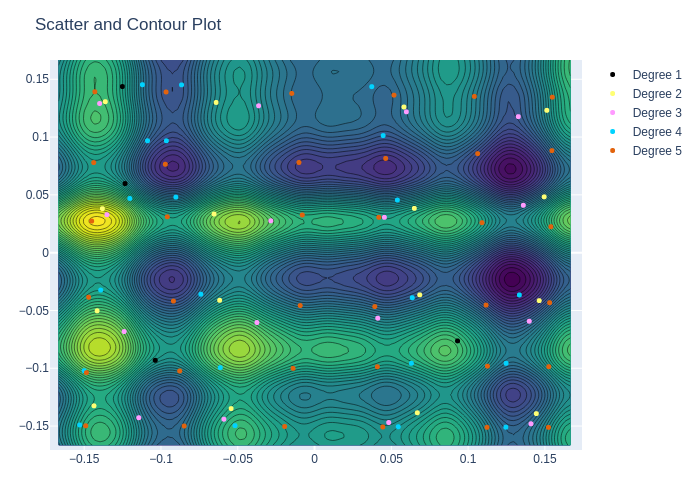

In [18]:
using PlotlyJS, Colors

# Define the function and domain

# Generate the grid and evaluate the function
N = 100  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for xi in x, yi in y]

# sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);
# Generate a color palette based on the number of unique `col` values
unique_cols = unique(df.col)
num_colors = length(unique_cols)
color_palette = distinguishable_colors(num_colors)

# Map the `col` values to the corresponding colors
col_to_color = Dict(unique_cols .=> color_palette)

# Create individual scatter traces for each unique `col` value
scatter_traces = [scatter(x=df[df.col .== c, :x], y=df[df.col .== c, :y], mode="markers", marker=attr(color=col_to_color[c], size=5), name="Degree $c") for c in unique_cols]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=50, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Display the combined plot with legend
display(plot(all_traces, Layout(title = "Scatter and Contour Plot")))



Doesn't make too much sense, but maybe we could plot the level sets of the polynomial approximants